# Atividade 1

```{admonition} Questão

Considere que uma seguradora vai assumir os riscos A e B na sua carteira. Para tanto precisa fixar o prêmio de risco e o prêmio puro para este negócio.

O valor da importância segurada do item A é 100 unidades monetárias e esta importância para o item B corresponde a 200 u.m.

No item A a probabilidade de ocorrência de sinistro no período de um ano é igual a $p_{1}$ enquanto que no item B esta probabilidade é $p_{2}$.

Na ocorrência de sinistro no item A o valor da indenização segue uma distribuição de probabilidade definida por:

$$
f_{Z_{1}}(z_{1}) = \frac{z_{1}}{200}; \quad  0 < z_{1} < 20 \\
0; \quad \text{caso contrário}
$$

Já na ocorrência de sinistro no item B o valor da indenização segue uma distribuição de probabilidade definida por:

$$
f_{Z_{2}}(z_{2}) = \frac{1}{20}; \quad  0 < z_{2} < 20 \\
0; \quad \text{caso contrário}
$$

```

## 1. Estabeleça a função densidade de $X_{2} = Z_{1} + Z_{2}$

A função densidade de probabilidade $X_{2} = Z_{1} + Z_{2}$ é definida como:

$$
f_{X_{2}}(x) = \int_{Z_{2}} f_{Z_{1}}(x - z_{2}) f_{Z_{2}}(z_{2}) dz_{2} \text{ para }
0 \le x - z_{2} \le 20 \text{ e }
0 \le z_{2} \le 20
$$

Utilizando as funções densidade de probabilidade de $Z_{1} e Z_{2}$, temos:

$$
f_{X_{2}}(x) = \int_{Z_{2}} \frac{x - z_{2}}{4000} dz_{2}
$$

Considerando $z_{2}$, temos os seguintes limites de integração:

$$
0 \le x - z_{2} \le 20 \rightarrow z_{2} \le x \le 20 + z_{2} \\
0 \le z_{2} \le 20
$$

Esboçando as regiões de integração $R1: z_{2} \le x$ e $R2: x \le 20 + z_{2}$, temos:

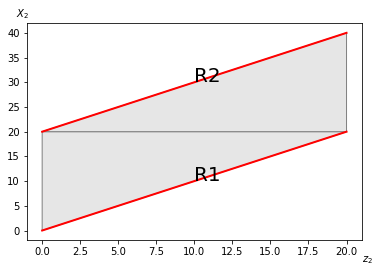

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Cria plot e adiciona nomes dos eixos (z2, X2)
fig, ax = plt.subplots()
fig.text(0.9, 0.05, r'$z_{2}$')
fig.text(0.1, 0.9, r'$X_{2}$')

class RegiaoIntegracao:
    def __init__(self, nome, x, y, area_inferior_y = True,):
        self.nome = nome
        self.x = x
        self.y = y
        self.vertices = [ *zip(x, y), (x[-1], y[0]) if area_inferior_y else (x[0], y[-1])]
        self.area = Polygon(self.vertices, facecolor='0.9', edgecolor='0.5')

x = np.linspace(0, 20)
r1 = RegiaoIntegracao('R1', x, x, area_inferior_y=False)
r2 = RegiaoIntegracao('R2', x, 20 + x)

regioes = [r1, r2]

for regiao in regioes:
    ax.plot(regiao.x, regiao.y, 'r', linewidth=2)
    ax.add_patch(regiao.area)
    ax.text(regiao.x.mean(), regiao.y.mean(), regiao.nome, fontsize=20)

plt.show()

Logo, temos que a função densidade de probabilidade de $X_{2}$ como:

$$
f_{X_{2}}(x) =
\begin{cases}
    \int_{0}^{x} \frac{x - z_{2}}{4000} dz_{2} & \quad \text{para } 0 \le x \le 20 \\
    \int_{x - 20}^{20} \frac{x - z_{2}}{4000} dz_{2} & \quad \text{para } 20 \le x \le 40
\end{cases}
$$

Resolvendo as integrais, temos:

$$
f_{X_{2}}(x) =
\begin{cases}
    \frac{x^{2}}{8000} & \quad \text{para } 0 \le x \le 20 \\
    \frac{-x^{2} + 40x}{8000} &  \quad \text{para } 20 \le x \le 40
\end{cases}
$$

## 2. Prove que esta é uma função densidade de probabilidade

Seja $F_{X_{2}}(x)$ a função acumulada de probabilidade de $X_{2}$, temos que:

$$
F_{X_{2}}(x) = 1
$$

Definimos $F_{X_{2}}(x)$ como:

$$
F_{X_{2}}(x) = \int_{0}^{40} f_{X_{2}}(x) dx = 1
$$

Aplicando os limites de integração encontrados no ítem 1, temos:

$$
\int_{0}^{20} \frac{x^{2}}{8000} dx + \int_{20}^{40} \frac{-x^{2} + 40x}{8000 } dx
$$

Resolvendo as itegrais:

In [2]:
import scipy.integrate as integrate
from IPython.display import display, Latex

def fx2_r1(x):
    return x**2 / 8000

def fx2_r2(x):
    return (-x**2 + 40*x) / 8000

# [0] porque integrate.quad() retorna tuple com o valor em [0] e o erro em [1]
F = integrate.quad(fx2_r1, 0, 20)[0] + integrate.quad(fx2_r2, 20, 40)[0]

display(Latex(r'F_{X_{2}} =' + str(F)))

<IPython.core.display.Latex object>

## 3. Faça o gráfico de função densidade de probabilidade de $X_{2}$

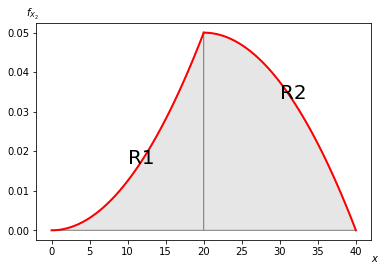

In [3]:
fig, ax = plt.subplots()
fig.text(0.9, 0.05, r'$x$')
fig.text(0.1, 0.9, r'$f_{X_{2}}$')

class Regiao:
    def __init__(self, nome, x, fx, area_inferior_y = True):
        self.nome = nome
        self.x = x
        self.y = fx(x)
        self.vertices = [*zip(x, self.y), (x[-1], self.y[0]) if area_inferior_y else (x[0], self.y[-1])]
        self.area = Polygon(self.vertices, facecolor='0.9', edgecolor='0.5')

r1 = Regiao('R1', np.linspace(0, 20), fx2_r1)
r2 = Regiao('R2', np.linspace(20, 40), fx2_r2, area_inferior_y= False)

regioes = [r1, r2]

for regiao in regioes:
    ax.plot(regiao.x, regiao.y, 'r', linewidth=2)
    ax.add_patch(regiao.area)
    ax.text(regiao.x.mean(), regiao.y.mean(), regiao.nome, fontsize=20)

plt.show()

## 4. Qual o valor esperado de $X_{2}$

O valor esperado de $X_{2}$ é dado por:

$$
E[X_{2}] = \int x f_{X_{2}}(x) dx
$$

Desmembrando a integral para cada região, temos:

$$
\int_{0}^{20} \frac{x^{3}}{8000} dx + \int_{20}^{40} \frac{-x^{3} + 40x^{2}}{8000} dx
$$

Desenvolvendo as integrais com os limites de integração:

$$

$$

In [4]:
def xfx2_r1(x):
    return x**3 / 8000

def xfx2_r2(x):
    return - (x**3 - 40*x**2)/8000

# [0] porque integrate.quad() retorna tuple com o valor em [0] e o erro em [1]
esperanca_X2 = integrate.quad(xfx2_r1, 0, 20)[0] + integrate.quad(xfx2_r2, 20, 40)[0]

display(Latex(r'E[X_{2}] = ' + str(esperanca_X2)))

<IPython.core.display.Latex object>

## 5. Considerando que um sinistro ocorre no risco A com probabilidade $p_{1}$ e um sinistro ocorre no risco B com probabilidade $p_{2}$ estabeleça a função densidade de probabilidade do montante agregado de sinistros ($X$).

A função densidade de $X$ é dada por:

$$
f_{X}(x) = \sum_{i=0}^{3} f_{X/I}(x/I=i).P[I=i]
$$

onde $i={0, 1, 2, 3}$ representam, respectivamente: 0 sinistros, sinistro A, sinistro B e sinistro em ambos. Substituindo pelas probabilidades para cada região, temos:

$$
f_{X}(x) =
\begin{cases}
    (1-p_{1})(1-p_{2}) & \quad x=0 \\
    \frac{x}{200}p_{1}(1-p_{2}) + \frac{1}{20}p_{2}(1-p_{1}) + \frac{x^{2}}{8000}p_{1}p_{2} & \quad x\in(0, 20) \\
    \frac{-x^{2} + 40x}{8000} & \quad x\in(20, 40) \\
    0 & \quad \text{caso contrário}
\end{cases}
$$

A função densidade de $X$ ($f_{X}(x)$) acima pode ser validada calculando a função acumulada de $X$ ($F_{X}(x) = 1$):

In [22]:
# Gera p1 e p2 aleatóriamente entre 0 e 1
p1 = np.random.rand()
p2 = np.random.rand()

def px0():
    return (1-p1) * (1 - p2)

def px0_20(x):
    return (x/200)*p1*(1-p2) + (1/20)*p2*(1-p1) + ((x**2)/8000)*p1*p2

def px20_40(x):
    return ((-x**2 + 40*x)/8000) * p1 * p2

# [0] porque integrate.quad() retorna tuple com o valor em [0] e o erro em [1]
acumulada = px0() + integrate.quad(px0_20, 0, 20)[0] + integrate.quad(px20_40, 20, 40)[0]
display(Latex(r'F_{X}(x) = ' + str(acumulada)))

<IPython.core.display.Latex object>

## 6. Qual a probabilidade de que a seguradora tenha que pagar indenização no período de um ano ($P[X>0]$)

$$
P[X>0] = \int_{0}^{40} f_{X}(x) dx
$$

Desmembrando a integral para as regiões de $x$, temos:

$$
P[X>0] = 
    \int_{0}^{20} \frac{x}{200}p_{1}(1-p_{2}) dx + 
    \int_{0}^{20} \frac{1}{20}p_{2}(1-p_{1}) dx +
    \int_{0}^{20} \frac{x^{2}}{8000}p_{1}p_{2} dx +
    \int_{20}^{40} \frac{-x^{2} + 40x}{8000}p_{1}p_{2} dx
$$

Desenvolvendo as integrais, temos:

$$
P[X>0] = 
    p_{1} - p_{1}p_{2} +
    p_{2} - p_{1}p_{2} +
    \frac{p_{1}p_{2}}{3} +
    \frac{2p_{1}p_{2}}{3}
$$

Simplificando, temos:

$$
P[X>0] = p_{1} + p_{2} - p_{1}p_{2}
$$

## 7. Qual a probabilidade de que a seguradora tenha que pagar mais do que t unidades monetárias em um ano – resolva para t pertencente ao intervalo (20;40)

$$
P[X>t] = \int_{t}^{40} \frac{-x^{2} + 40x}{8000}p_{1}p_{2} dx
$$

Desenvolvendo a integral, temos:

$$
P[X>t] = \frac{p_{1}p_{2}(t^3 - 60t^2 + 32000)}{24000}
$$

## 8. Para probabilidades de sinistro $p_{1}=0,1$ e $p_{2}=0,3$ qual a probabilidade de $X>20$

In [5]:
p1 = .1
p2 = .3

def px(x):
    return ((-x**2 + 40*x)/8000) * p1 * p2

# [0] porque integrate.quad() retorna tuple com o valor em [0] e o erro em [1]
PX_maior_20 = integrate.quad(px, 20, 40)[0]

display(Latex(r'P[X > 20] = ' + str(PX_maior_20)))

<IPython.core.display.Latex object>

## 9. Qual o valor esperado de $X$ (prêmio de risco) ($E[X]$)? (determine a fórmula genérica para diferentes valores de $p_{1}$ e $p_{2}$)

### Para probabilidades de sinistro $p_{1}$=0,1 e $p_{2}$=0,3 qual o valor esperado de $X$?

### Para probabilidades de sinistro $p_{1}$=0,01 e $p_{2}$=0,03 qual o valor esperado de $X$?


$E[X]$ para dois riscos com probabilidades de sinistro $p_{1}$ e $p_{2}$ é dado por:

$$
E[X] = p_{1} E[Z_{1}] + p_{2} E[Z_{2}]
$$


In [6]:
# E[Z1] = integral z1 * z1/200
esperanca_Z1 = integrate.quad(lambda z1: z1**2/200, 0, 20)[0]

# Z2 segue uma Uniforme(0, 20)
esperanca_Z2 = (0 + 20)/2

def esperanca_X(p1, p2):
    return p1*esperanca_Z1 + p2*esperanca_Z2

display(Latex(
    r'E[X] = '
    f'{esperanca_Z1:.2f}' + 'p_{1} +'
    f'{esperanca_Z2:.2f}' + 'p_{2}'))

<IPython.core.display.Latex object>

Para $p_{1} = 0,1$ e $p_{2} = 0,3$:

In [7]:
x = esperanca_X(.1, .3)
display(x)

4.333333333333333

Para $p_{1} = 0,01$ e $p_{2} = 0,03$:

In [8]:
x = esperanca_X(.01, .03)
display(x)

0.43333333333333335

## 10. 	Simule 20.000 repetições de $X$ para $p_{1}=0,6$ e $p_{2}=0,6$ e calcule:

### a. A distribuição de frequência das simulações estabelecendo a frequência percentual de 0’s e das classes definidas por 0,0001 a 4; 4,0001 a 8; ... ; 36,0001 a 40

In [146]:
from scipy.stats import uniform
from IPython.display import Markdown
import pandas as pd

n = 20000
p1 = .6
p2 = .6
classes = [0, 0.0001, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
uniforme = uniform(0, 20)

def z1():
    return uniforme.rvs()**3/600

def z2():
    return uniforme.rvs()

simulacoes = []

for simulacao in range(0, n):
    sinistro_a = int(np.random.rand() >= p1)
    sinistro_b = int(np.random.rand() >= p2)
    x = sinistro_a * z1() + sinistro_b * z2()
    simulacoes.append(x)

simulacoes = pd.DataFrame({'X': simulacoes,'classes': pd.cut(simulacoes, classes)})
#simulacoes.classes.value_counts().plot.bar();
distribuicao_frequencias = simulacoes['classes'].value_counts(normalize=True)
#distribuicao_frequencias.sort_index().plot.bar(width=1);


In [154]:
display(Markdown(distribuicao_frequencias.to_markdown()))

|               |     classes |
|:--------------|------------:|
| (0.0001, 4.0] | 0.343232    |
| (4.0, 8.0]    | 0.182742    |
| (8.0, 12.0]   | 0.16708     |
| (12.0, 16.0]  | 0.132811    |
| (16.0, 20.0]  | 0.127462    |
| (20.0, 24.0]  | 0.0241898   |
| (24.0, 28.0]  | 0.0102341   |
| (0.0, 0.0001] | 0.00736548  |
| (28.0, 32.0]  | 0.00457435  |
| (32.0, 36.0]  | 0.000310126 |
| (36.0, 40.0]  | 0           |